Linear  Regression


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
insurance = pd.read_csv('insurance.csv')
df=insurance.copy()
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.isnull().values.any()

False

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [ ]:
df2=df.copy()
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df2['sex'] = df2['sex'].map({'female': 0, 'male': 1})

df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})

df2['region'] = df2['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

print(df2.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


In [ ]:
df2.corr()  # All cloumns'correlation including string ones.

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


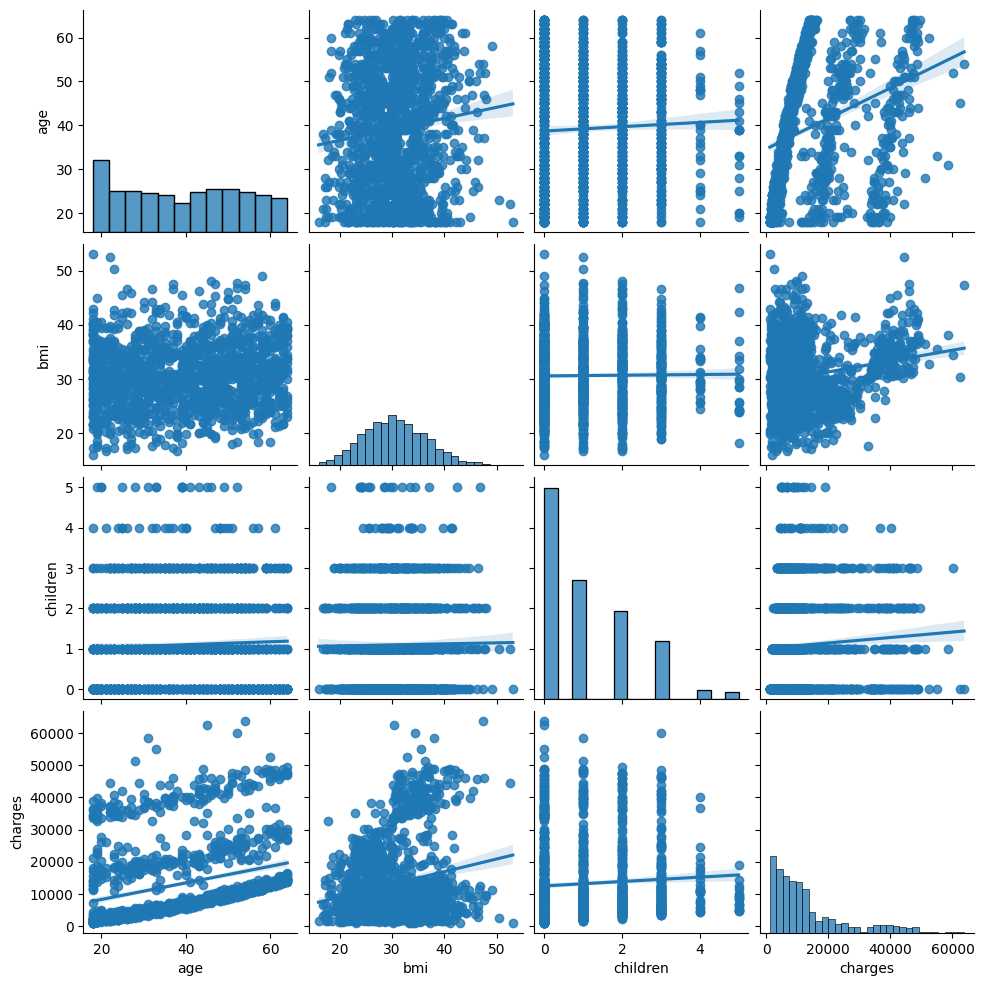

In [ ]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

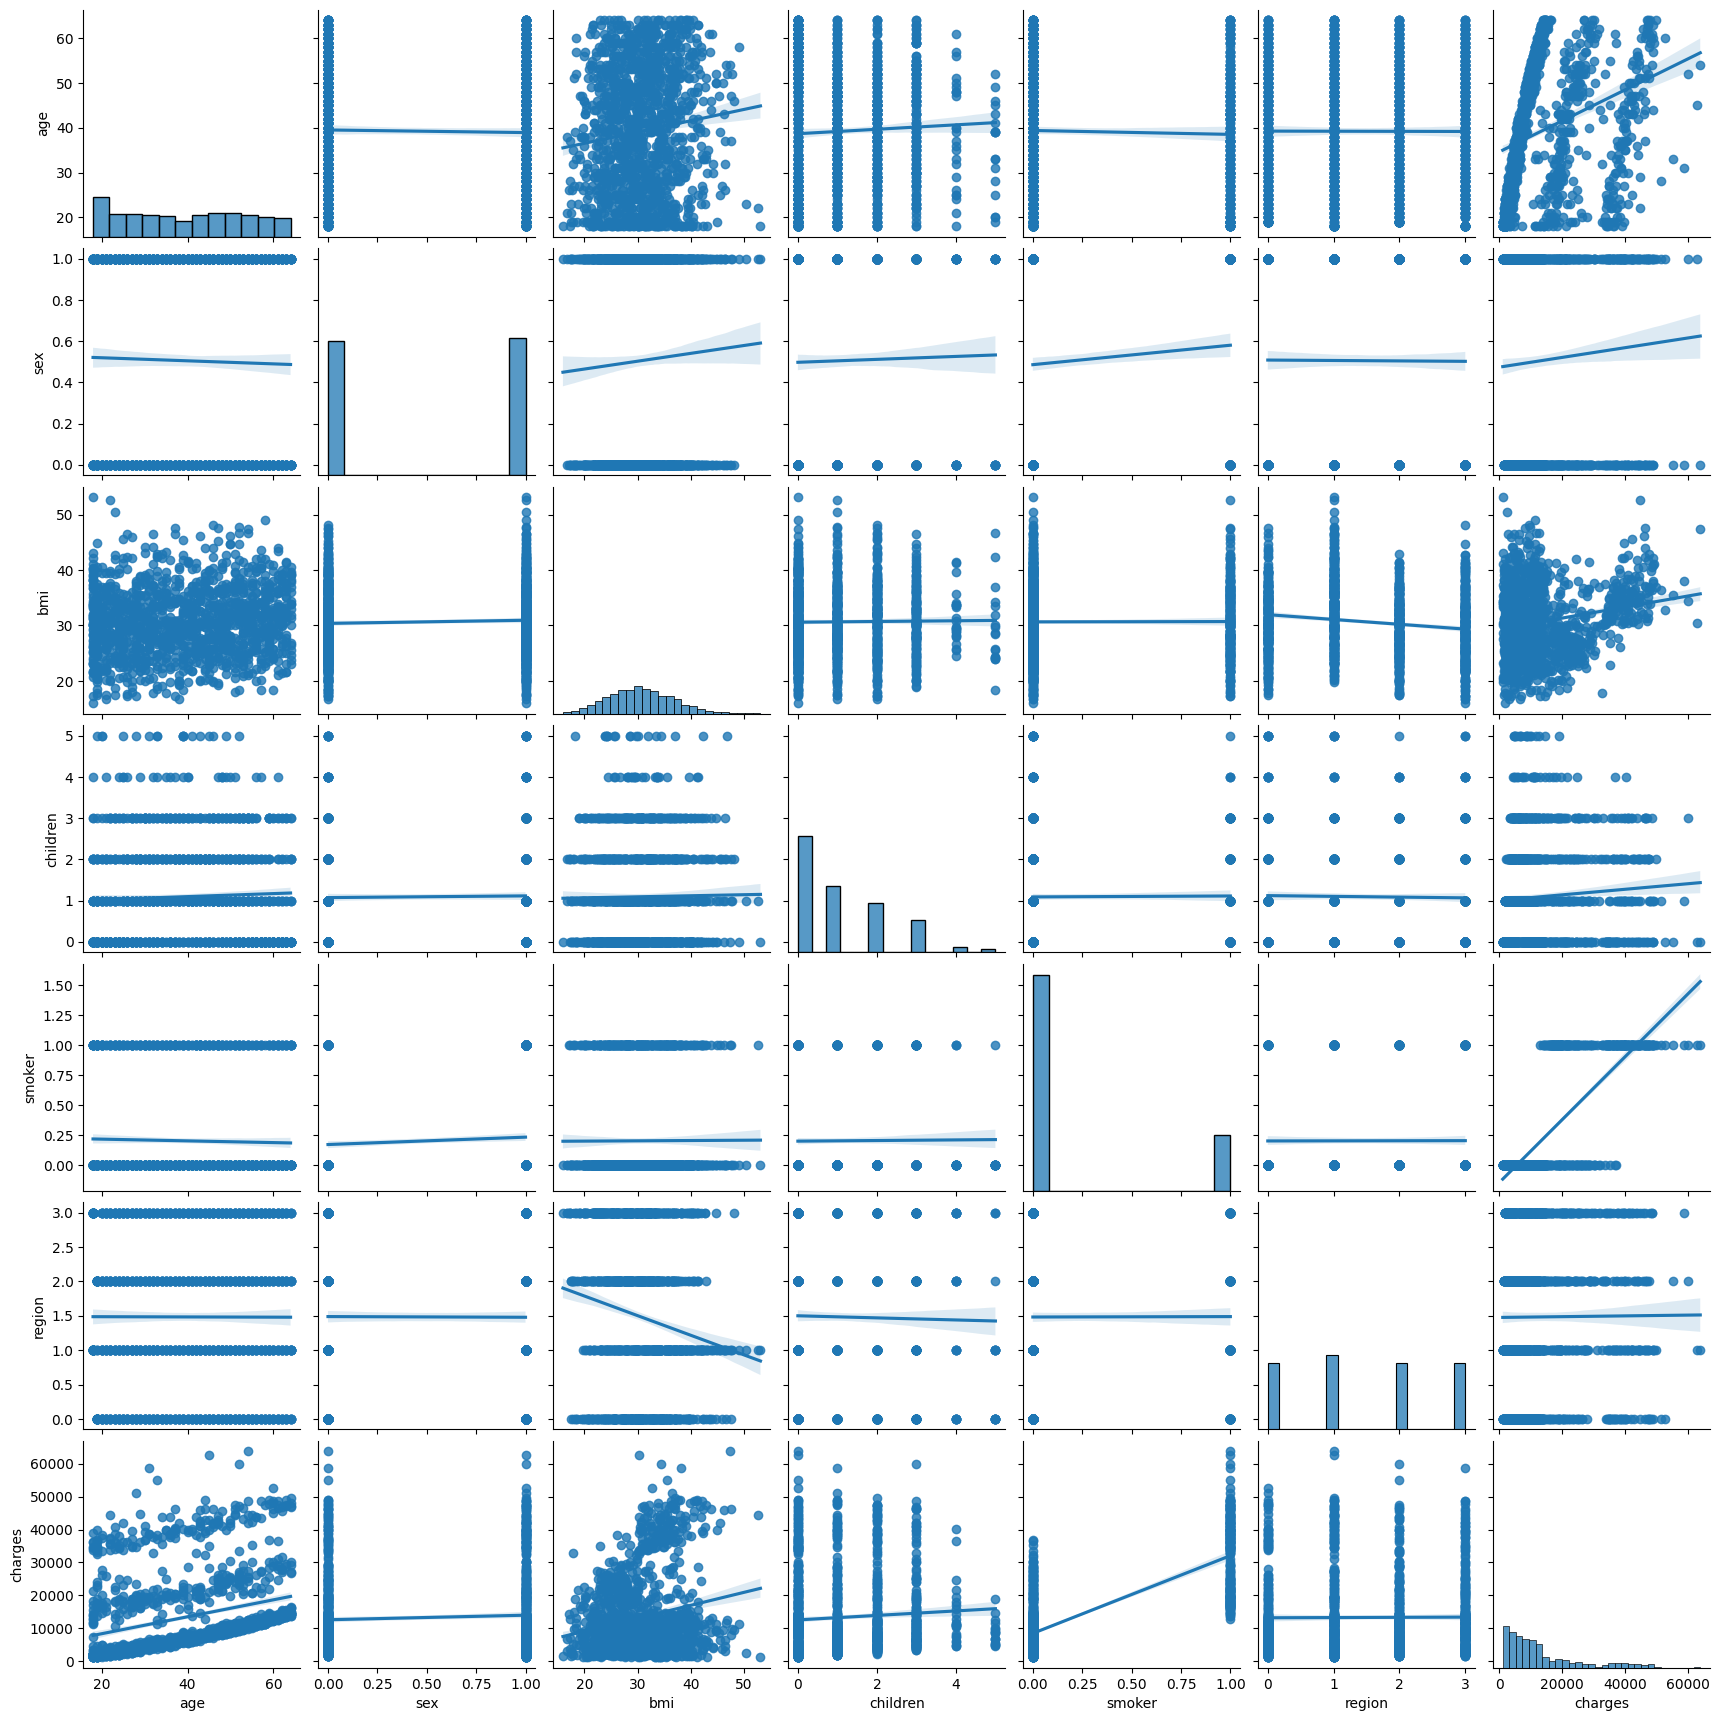

In [ ]:
import seaborn as sns
sns.pairplot(df2, kind  ="reg");

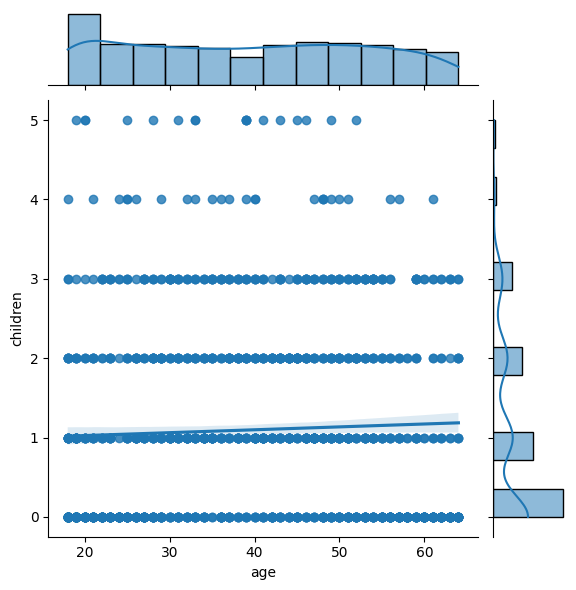

In [ ]:
sns.jointplot(x = "age", y = "children", data = df, kind = "reg")


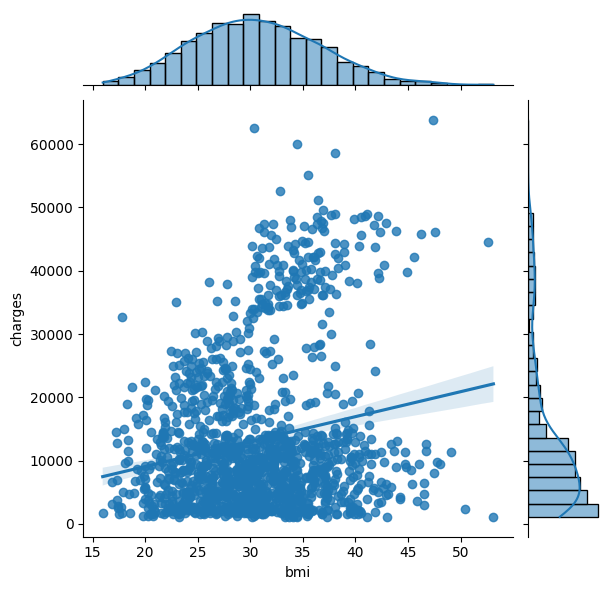

In [ ]:
sns.jointplot(x = "bmi", y = "charges", data = df, kind = "reg")


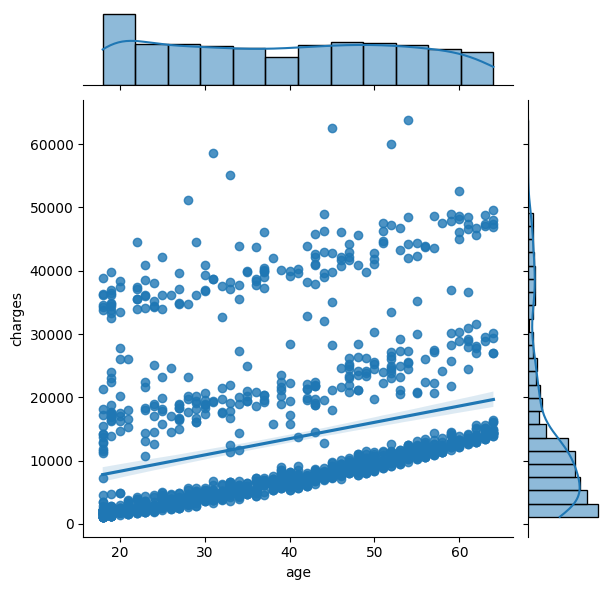

In [ ]:
sns.jointplot(x = "age", y = "charges", data = df, kind = "reg")


Simple Linear Regression

*Modelling

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
X = df2[["bmi"]]
y = df2["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

1192.9372089611497

In [ ]:
model.coef_

array([393.8730308])

In [ ]:
model.score(X,y)


0.03933913991786264

In [ ]:
# model denklemi= 1192.9 + 393.87*10
model.predict([[10]])


array([5131.66751694])

In [ ]:
model.predict(X)[0:10]


array([12181.99476821, 14494.02945899, 14190.74722528, 10135.82437322,
       12567.99033839, 11331.22902169, 14364.05135883, 12118.97508328,
       12942.16971765, 11370.61632477])

In [ ]:
y[0:10]


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [ ]:
new_bmi = [[20],[25],[30],[35]]
model.predict(new_bmi)


array([ 9070.39782491, 11039.7629789 , 13009.12813288, 14978.49328687])

In [ ]:
model.predict([[32]])

array([13796.87419448])

Another Sample for Linear Regression

In [ ]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

3165.8850060630284

In [ ]:
model.coef_

array([257.72261867])

In [ ]:
LR_r2= model.score(X,y)
LR_r2

0.08940589967885804

In [ ]:
model.predict([[20]])

array([8320.3373794])

In [ ]:
model.predict(X)[0:20]


array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608,  9608.95047274, 19144.68736341,
        9093.5052354 , 17598.35165141, 10124.39571007,  8062.61476073,
       16567.46117674,  9093.5052354 , 17598.35165141, 10897.56356607])

In [ ]:
y[0:20]


0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
13    11090.71780
14    39611.75770
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
Name: charges, dtype: float64

Error Detection


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
reg.predict(X)[0:10]


array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [ ]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [ ]:
k_t = pd.DataFrame({"real_y": y[0:10],
                   "guess_y": reg.predict(X)[0:10]})

k_t

,real_y,guess_y
0,16884.92400,8062.614761
1,1725.55230,7804.892142
2,4449.46200,10382.118329
3,21984.47061,11670.731422
4,3866.85520,11413.008803
5,3756.62160,11155.286185
6,8240.58960,15021.125465
7,7281.50560,12701.621897
8,6406.41070,12701.621897
9,28923.13692,18629.242126


In [ ]:
k_t["error"] = k_t["real_y"] - k_t["guess_y"]
k_t

,real_y,guess_y,error
0,16884.92400,8062.614761,8822.309239
1,1725.55230,7804.892142,-6079.339842
2,4449.46200,10382.118329,-5932.656329
3,21984.47061,11670.731422,10313.739188
4,3866.85520,11413.008803,-7546.153603
5,3756.62160,11155.286185,-7398.664585
6,8240.58960,15021.125465,-6780.535865
7,7281.50560,12701.621897,-5420.116297
8,6406.41070,12701.621897,-6295.211197
9,28923.13692,18629.242126,10293.894794


In [ ]:
k_t["error_square"] = k_t["error"]**2
k_t

,real_y,guess_y,error,error_square
0,16884.92400,8062.614761,8822.309239,7.783314e+07
1,1725.55230,7804.892142,-6079.339842,3.695837e+07
2,4449.46200,10382.118329,-5932.656329,3.519641e+07
3,21984.47061,11670.731422,10313.739188,1.063732e+08
4,3866.85520,11413.008803,-7546.153603,5.694443e+07
5,3756.62160,11155.286185,-7398.664585,5.474024e+07
6,8240.58960,15021.125465,-6780.535865,4.597567e+07
7,7281.50560,12701.621897,-5420.116297,2.937766e+07
8,6406.41070,12701.621897,-6295.211197,3.962968e+07
9,28923.13692,18629.242126,10293.894794,1.059643e+08


In [ ]:
import numpy as np
np.sum(k_t["error_square"])


588993093.5467993

In [ ]:
np.mean(k_t["error_square"])


58899309.35467993

In [ ]:
LR_rmse=np.sqrt(np.mean(k_t["error_square"]))
LR_rmse

7674.588546279203

Multiple Linear Regression¶


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


In [ ]:
X = df2.drop("charges", axis = 1)
y = df2["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df2.copy()
print("training", training.shape)

X_train (1070, 6)
y_train (1070,)
X_test (268, 6)
y_test (268,)
training (1338, 7)


In [ ]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
model.intercept_


-12760.459365293491

In [ ]:
model.coef_


array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04,  2.71284266e+02])

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,2
1285,47,0,24.320,0,0,3
1142,52,0,24.860,0,0,1
969,39,0,34.320,5,0,1
486,54,0,21.470,3,0,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,3
1130,39,0,23.870,5,0,1
1294,58,1,25.175,0,0,3
860,37,0,47.600,2,1,0


In [ ]:
new_data = [[60], [1],[30],[5],[1],[2]]
new_data = pd.DataFrame(new_data).T

In [ ]:
model.predict(new_data)


array([39033.41363437])

In [ ]:
df2.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
MLR_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [ ]:
MLR_rmse

6105.789320191615

Model Tunning


In [ ]:
X = df2.drop('charges', axis=1)
y = df2["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [ ]:
MLR_r2 = model.score(X_train, y_train)
MLR_r2

0.7513733233356823

In [ ]:
MLR_rmse = np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
MLR_rmse

6101.2505529905275

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

5626.223721550143

PCR

Modelling

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
dms = pd.get_dummies(df[[ 'sex', 'smoker' ]])
dms.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,True,False,False,True
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


In [ ]:
y = df["charges"]

In [ ]:
X_ = df.drop(["charges","sex","smoker","region"], axis = 1).astype("float64")

In [ ]:
X_.head()


,age,bmi,children
0,19.0,27.900,0.0
1,18.0,33.770,1.0
2,28.0,33.000,3.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0


In [ ]:
X = pd.concat([X_, dms[["sex_female", "smoker_yes",]]], axis = 1)
X.head()

,age,bmi,children,sex_female,smoker_yes
0,19.0,27.900,0.0,True,True
1,18.0,33.770,1.0,False,False
2,28.0,33.000,3.0,False,False
3,33.0,22.705,0.0,False,False
4,32.0,28.880,0.0,False,False


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   float64
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   float64
 3   sex_female  1338 non-null   bool   
 4   smoker_yes  1338 non-null   bool   
dtypes: bool(2), float64(3)
memory usage: 34.1 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (1003, 5)
y_train (1003,)
X_test (335, 5)
y_test (335,)
training (1338, 7)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))


In [ ]:
X_reduced_train[0:1,:]


array([[ 1.69127064, -0.32592751, -0.4601335 , -1.17249043, -0.11372038]])

In [ ]:
X_reduced_train.shape


(1003, 5)

In [ ]:
X_reduced_train[0:10,0]


array([ 1.69127064,  0.56568038, -1.50158738, -0.36893776, -0.58969431,
       -0.79913374,  0.72820132,  0.39644162,  0.75252204,  1.08276016])

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] # Verinin ½ kaçını ifade ediyor


array([ 22.56,  43.9 ,  63.77,  82.69, 100.  ])

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
pcr_model.intercept_


13267.935817337988

In [ ]:
pcr_model.coef_


array([-1751.90952852,  6768.0618618 , -2003.966619  ,  6545.22211802,
       -3584.34393122])

Guess


In [ ]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]


array([ 1754.57996913,  4533.44578628, 14466.05069057, 35868.37853991,
        9996.9583838 ])

In [ ]:
PCR_rmse= np.sqrt(mean_squared_error(y_train, y_pred))
PCR_rmse

6092.54026520953

In [ ]:
df["charges"].mean()


13270.422265141257

In [ ]:
PCR_r2= r2_score(y_train, y_pred)
PCR_r2

0.7441660615416086

In [ ]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))


15162.132176975787

Model Tuning


In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

15162.132176975787


In [ ]:
from sklearn import model_selection


In [ ]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [ ]:
lm = LinearRegression()
RMSE = []


In [ ]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

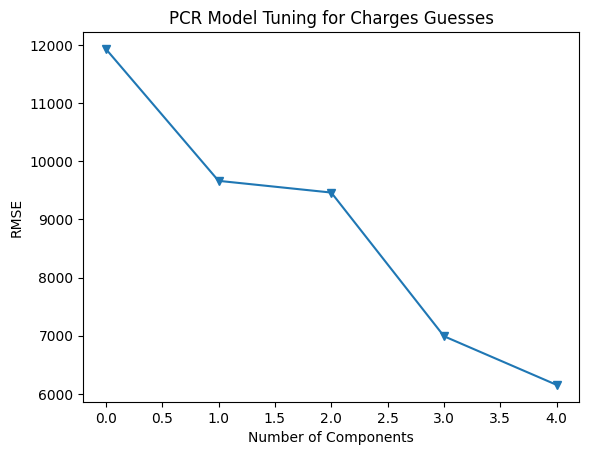

In [ ]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charges Guesses');

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,:], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,:])
print(np.sqrt(mean_squared_error(y_train, y_pred)))


6092.54026520953


In [ ]:
y_pred = pcr_model.predict(X_reduced_test[:,:])
print(np.sqrt(mean_squared_error(y_test, y_pred)))


15162.132176975787


PLS

Model

In [ ]:
ms = pd.get_dummies(df[[ 'sex', 'smoker' ]])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, ms[['sex_female', 'smoker_yes']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ms.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,True,False,False,True
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD


In [ ]:
pls_model = PLSRegression().fit(X_train, y_train)


In [ ]:
pls_model.coef_


array([[3605.18770478, 1987.93929008,  522.60978193,  -22.93389063,
        9563.04171903]])

Guess

In [ ]:
X_train.head()


,age,bmi,children,sex_female,smoker_yes
693,24.0,23.655,0.0,False,False
1297,28.0,26.510,2.0,True,False
634,51.0,39.700,1.0,False,False
1022,47.0,36.080,1.0,False,True
178,46.0,28.900,2.0,True,False


In [ ]:
pls_model.predict(X_train)[0:10]


array([ 1767.64088953,  4560.5214102 , 14439.46826918, 35875.66418488,
        9972.98809376, 12584.83456653,  4959.7398184 ,  4929.89261855,
        4365.69251157,  2316.70011052])

In [ ]:
y_train[0:10]


693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
287     14256.19280
1290     7133.90250
1113     5312.16985
294      3906.12700
471      2203.47185
Name: charges, dtype: float64

In [ ]:
y_pred = pls_model.predict(X_train)


In [ ]:
PLS_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
PLS_rmse

6092.746123675243

In [ ]:
PLS_r2 = r2_score(y_train, y_pred)
PLS_r2

0.74414877270329

In [ ]:
y_pred = pls_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))


5950.599557128064

In [ ]:
df["charges"].mean()


13270.422265141257

Model Tunning

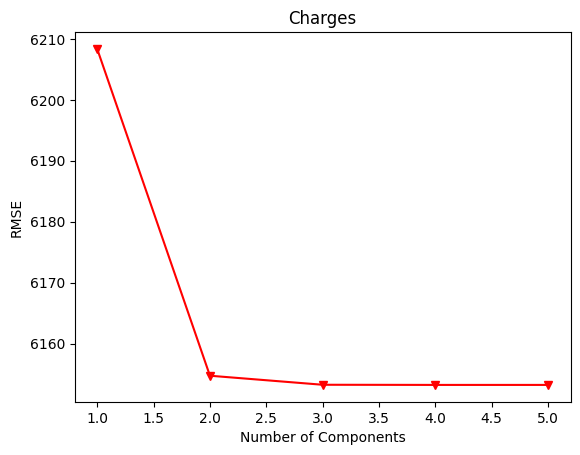

In [ ]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Result Visualization
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('Charges');

In [ ]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


5950.599557128064

Ridge Regresyon


Model

In [ ]:
ms = pd.get_dummies(df[[ 'sex', 'smoker' ]])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, ms[['sex_female', 'smoker_yes']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ms.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,True,False,False,True
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model


Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_


array([  260.01953979,   327.56182403,   434.9046627 ,   -66.67378202,
       23613.74251879])

In [ ]:
10**np.linspace(10,-2,100)*0.5 


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

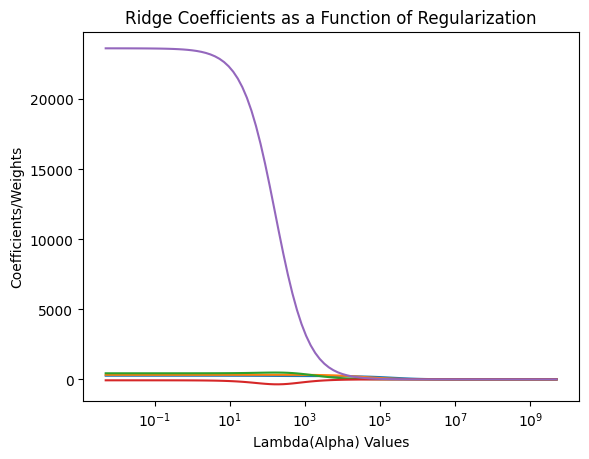

In [ ]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

Guess


In [ ]:
y_pred = ridge_model.predict(X_test)


In [ ]:
RIDGE_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
RIDGE_rmse

5952.163416811984

In [ ]:
RIDGE_r2 = r2_score(y_test, y_pred)
RIDGE_r2

0.7652065627590778

Model Tuning

In [ ]:
lambdas = 10**np.linspace(10,-2,100)*0.5 
lambdas[0:5]


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error")

In [ ]:
ridge_cv.fit(X_train, y_train)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [ ]:
ridge_cv.alpha_


0.18824679033962358

In [ ]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_ 
                   ).fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))


5952.71231491631

Lasso Regresyon


Model

In [ ]:
ms = pd.get_dummies(df[[ 'sex', 'smoker' ]])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, ms[['sex_female', 'smoker_yes']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ms.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,True,False,False,True
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


In [ ]:
X.head()

,age,bmi,children,sex_female,smoker_yes
0,19.0,27.900,0.0,True,True
1,18.0,33.770,1.0,False,False
2,28.0,33.000,3.0,False,False
3,33.0,22.705,0.0,False,False
4,32.0,28.880,0.0,False,False


In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)


In [ ]:
lasso_model


Lasso(alpha=0.1)

In [ ]:
lasso_model.coef_


array([  260.03564316,   327.55719128,   434.74241445,   -65.69665573,
       23627.65513354])

Text(0, 0.5, 'weights')

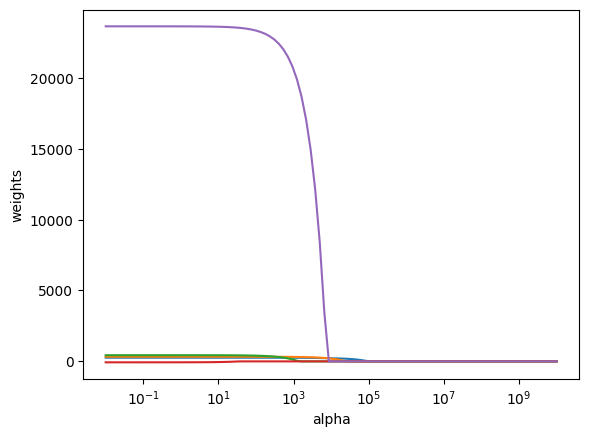

In [ ]:
lasso = Lasso()
lambdas = 10**np.linspace(10,-2,100)*0.5 
coefficients = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Guess

In [ ]:
lasso_model.predict(X_test)


array([ 8.51702828e+03,  6.89423726e+03,  3.67759986e+04,  9.46421059e+03,
        2.67893418e+04,  1.10935417e+04,  1.53146010e+01,  1.68237204e+04,
        6.44149065e+02,  1.12089735e+04,  2.84907310e+04,  9.31630455e+03,
        5.36788058e+03,  3.85309529e+04,  4.03988179e+04,  3.72392761e+04,
        1.52910595e+04,  3.59821799e+04,  9.28404843e+03,  3.13152501e+04,
        4.26860390e+03,  1.04947658e+04,  2.66379971e+03,  6.45888537e+03,
        1.12166048e+04,  1.24461810e+04,  1.47990832e+04,  5.98261544e+03,
        9.50386856e+03,  2.31859920e+03,  9.43750831e+03,  1.29462265e+04,
        4.58235499e+03,  3.33974972e+03,  4.78776875e+03,  1.25054018e+04,
        2.24268799e+03,  9.10992231e+03,  3.31878932e+04,  3.27190777e+04,
        4.18221218e+03,  4.18982839e+03,  1.44229731e+04,  1.14470929e+04,
        8.92621452e+03,  1.25500520e+04,  5.04566890e+03,  3.46444529e+03,
        3.56610311e+04,  9.27089422e+03,  1.59722588e+04,  2.50112257e+03,
        1.21032742e+04,  

In [ ]:
y_pred = lasso_model.predict(X_test)


In [ ]:
LASSO_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
LASSO_rmse 

5952.150453548927

In [ ]:
LASSO_r2 = r2_score(y_test, y_pred)
LASSO_r2

0.7652075854748749

Model Tuning


In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000)

In [ ]:
lasso_cv_model.fit(X_train,y_train)


LassoCV(cv=10, max_iter=10000)

In [ ]:
lasso_cv_model.alpha_


61.14507733769298

In [ ]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)


In [ ]:
lasso_tuned.fit(X_train, y_train)


Lasso(alpha=61.14507733769298)

In [ ]:
y_pred = lasso_tuned.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))


5960.527902131975

ElasticNet Regresyonu


Model

In [ ]:
ms = pd.get_dummies(df[[ 'sex', 'smoker' ]])
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, ms[['sex_female', 'smoker_yes']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X.head()

,age,bmi,children,sex_female,smoker_yes
0,19.0,27.900,0.0,True,True
1,18.0,33.770,1.0,False,False
2,28.0,33.000,3.0,False,False
3,33.0,22.705,0.0,False,False
4,32.0,28.880,0.0,False,False


In [ ]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_


array([ 240.06981358,  326.39340656,  444.79331425, -281.36871177,
       5803.46071436])

In [ ]:
enet_model.intercept_


-7658.776699566559

Guess

In [ ]:
enet_model


ElasticNet()

In [ ]:
enet_model.predict(X_test)


array([11969.53683833, 10500.69794236, 22002.87010741, 13121.81291967,
       13124.4880101 , 14950.66741768,  3969.9285953 , 20077.63344507,
        4425.15136826, 14803.25094272, 14645.15748494, 13058.04659228,
        9124.65339674, 24345.0361499 , 25904.89102588, 23027.31113287,
       18643.33267442, 21547.1803377 , 12703.1943815 , 16961.40402223,
        8367.73762791, 14194.23696662,  6824.90931777, 10333.4800354 ,
       14575.90780279, 15690.16104824, 17920.45197359,  9798.4790574 ,
       12914.78706983,  6499.97721848, 13005.14720098, 16131.30412638,
        8482.65876046,  7107.87739962,  8819.63396446, 16136.45445951,
        6162.89992118, 12586.81274289, 18667.61182364, 18721.03852872,
        8179.99904547,  8299.98580899, 17633.44141811, 14815.31843258,
       12821.67806147, 15925.95429621,  8967.51756484,  7327.33965024,
       21542.43677533, 13203.21702762, 19032.3335022 ,  6693.44760969,
       15626.65534568,  5189.50769116, 17022.85784865, 15714.79289247,
      

In [ ]:
y_pred = enet_model.predict(X_test)


In [ ]:
EN_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
EN_rmse 

9535.755500376074

In [ ]:
EN_r2 = r2_score(y_test, y_pred)
EN_r2 

0.39737592849395265

Model Tuning


In [ ]:
from sklearn.linear_model import ElasticNetCV
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
enet_cv_model.alpha_


99.19331475924518

In [ ]:
enet_cv_model


ElasticNetCV(cv=10, random_state=0)

In [ ]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)


In [ ]:
y_pred = enet_tuned.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))


11544.452662887159

In [ ]:
model_names = [ "MLR","PCR", "PLS",  "RIDGE", "LASSO", "EN"]
r2_scores = [MLR_r2, PCR_r2, PLS_r2, RIDGE_r2, LASSO_r2, EN_r2]
rmse_values = [MLR_rmse, PCR_rmse, PLS_rmse, RIDGE_rmse, LASSO_rmse, EN_rmse]


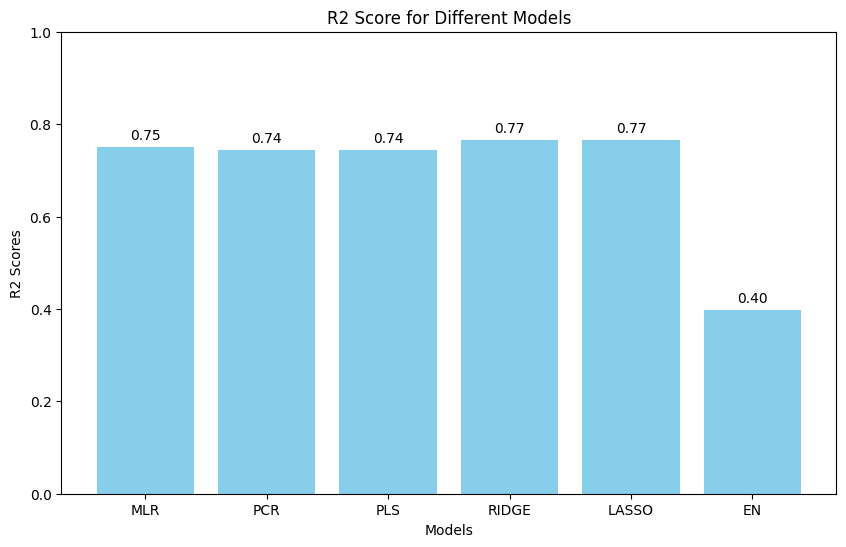

In [ ]:
# R2 Score Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Score for Different Models')
plt.ylim(0, 1)  # Y-axis limit between 0 and 1 for R2 Score

# Adding text labels on top of each bar
for bar, r2_score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{r2_score:.2f}', ha='center', va='bottom')

plt.show()

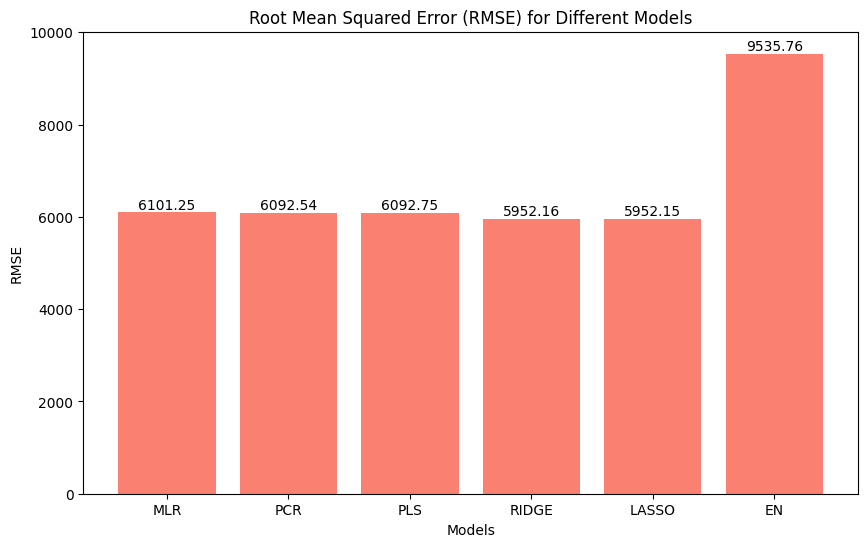

In [ ]:
# RMSE Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Models')

# Adding text labels on top of each bar
for bar, rmse_value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{rmse_value:.2f}', ha='center', va='bottom')

plt.show()